<a href="https://colab.research.google.com/github/abaducnv/data_mining/blob/master/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

đoc dữ liệu

In [ ]:
#df = pd.read_excel('data_lazada_2.xlsx')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_mining/datatext.csv')[['category','content']]
df.columns = ['label', 'message']
df.head()

,label,message
0,1,washington reuters the donald trump administr...
1,1,if you want to be leader whom people follow w...
2,1,starbucks ha been ordered to pay florida woma...
3,1,talentsmart ha conducted research with more t...
4,1,wall street looked at the news coming out of ...


In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
1        1500   1500   brian shin founder ceo visible measure the pr...    1
2        1500   1498   streamline recommends moonrise kingdom a the ...    3
3        1500   1499   student from marjory stoneman douglas high sc...    2
4        1500   1500   the mystery behind the rio olympics unsightly...    1
5        1499   1497   apple is standing up for it right to lock dow...    2

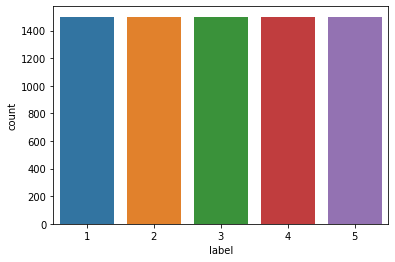

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import PorterStemmer as Stemmer
def process(text):
    # chuyển về chữ thường
    text = str(text).lower()
    # bỏ các dấu câu
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Test with our dataset
df['message'][:20].apply(process)

0     [washington, reuter, donald, trump, administr,...
1     [want, leader, peopl, follow, absolut, convict...
2     [starbuck, ha, order, pay, florida, woman, 100...
3     [talentsmart, ha, conduct, research, million, ...
4     [wall, street, look, news, come, washington, d...
5     [sophi, quinton, krishna, regmi, start, work, ...
6     [alreadi, stab, uber, way, potenti, disastr, l...
7     [new, york, reuter, u, film, tv, studio, weins...
8     [traffic, nerv, blister, pit, stain, hard, cop...
9     [want, million, dollar, learn, negoti, salari,...
10    [one, popular, dilbert, comic, strip, cartoon,...
11    [mani, thing, get, good, hardwork, peopl, fire...
12    [influenti, peopl, profound, impact, everyon, ...
13    [waymo, lawsuit, uber, alleg, ridehail, giant,...
14    [go, without, say, first, time, anyth, rare, e...
15    [generallyunspoken, wellunderstood, rule, work...
16    [what, wrong, twoword, question, summarili, im...
17    [world, went, bit, duller, crayola, announ

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Mã hóa Tfidf

In [ ]:

tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'].values.astype('U'))

In [ ]:
mess = df.iloc[2]['message']
print(mess)

 starbucks ha been ordered to pay florida woman 100000 after she suffered first and seconddegree burn from their coffee her lawyer announced joanne mogavero 43 endured permanent scarring after the lid on ventisized pike place coffee popped off at jacksonville drivethru window in 2014 the slip led to the scalding 190degree beverage to pour on her lap her attorney said in statement the lid wa either not attached properly or wa defective her lawsuit said according to copy that huffpost obtained a duval county jury on thursday awarded the mother of three 85000 for pain and suffering physical impairment disfigurement inconvenience and loss of capacity for enjoyment of life it also ordered that she receive 15000 for medical bill mogaveros lawyer pressed that the coffee giant should warn it customer that their lid have tendency to pop off during trial starbucks representative reportedly testified that the company receives 80 complaint month about lid coming off and leaking like this despite t

In [ ]:
print(tfidfv.transform([mess]))

  (0, 55318)	0.02201555289370372
  (0, 55133)	0.03387103425108603
  (0, 54933)	0.06151837305995713
  (0, 54042)	0.0930302799324798
  (0, 53996)	0.05305180884962282
  (0, 53842)	0.0492252985521462
  (0, 53321)	0.07939163551602019
  (0, 53299)	0.11559076729690276
  (0, 51208)	0.05810471505629371
  (0, 50719)	0.0242655076305579
  (0, 50423)	0.03593237992690306
  (0, 50310)	0.03289969181456069
  (0, 49888)	0.06400378057311833
  (0, 49777)	0.0710634456286206
  (0, 49079)	0.07807209619365443
  (0, 48547)	0.10268742023168227
  (0, 47940)	0.05296324078914078
  (0, 47751)	0.06521157066235113
  (0, 47658)	0.29281811178744155
  (0, 47618)	0.04082242934429902
  (0, 47363)	0.058361627451622176
  (0, 46452)	0.06863182791937655
  (0, 44750)	0.02883589506948595
  (0, 44680)	0.09990111365187064
  (0, 44212)	0.08675309927365273
  :	:
  (0, 13419)	0.054578640599424334
  (0, 13361)	0.03170138963045021
  (0, 13322)	0.026273089217379402
  (0, 13131)	0.20093371999846307
  (0, 12843)	0.05392710395396372
  (0,

In [ ]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names()[i],sep='\t')

index	idf	tfidf	term
109	5.3479	0.0670	100000
845	6.3963	0.0801	15000
1288	9.2295	0.1156	190degre
1574	3.3687	0.0422	2014
3015	5.4009	0.0676	43
4305	4.5021	0.0564	80
4421	7.2146	0.0904	85000
4968	2.1180	0.0265	accord
5962	1.6216	0.0203	also
6175	3.5614	0.0446	amount
6404	2.6770	0.0335	announc
6769	4.2914	0.0537	appeal
7400	5.1605	0.0646	attach
7424	3.4978	0.0438	attorney
7645	3.8024	0.0476	award
8951	6.5215	0.0817	beverag
9117	3.1774	0.0398	bill
10759	4.7636	0.0597	burn
11298	5.0943	0.0638	capac
11576	2.8579	0.0358	case
12843	4.3059	0.0539	client
13131	5.3479	0.2009	coffe
13322	2.0978	0.0263	come
13361	2.5312	0.0317	comment
13419	2.1790	0.0546	compani
13459	4.3354	0.0543	complaint
13713	2.9961	0.0375	consid
13783	4.1797	0.0523	contact
13929	4.8475	0.0607	copi
14203	4.4092	0.0552	counti
14846	3.3365	0.0836	custom
15591	6.1850	0.0775	defect
15988	3.4184	0.0428	despit
16196	2.6330	0.0330	didnt
16480	8.8240	0.1105	disfigur
17178	8.3132	0.1041	drivethru
17452	8.8240	0.1105	duval
17544	6.787

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
text = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

**Perform train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'].values.astype('U'), df['label'], test_size=0.05)
#id=4463
#x_train=df['message'][0:id].values.astype('U')
#y_train=df['label'][0:id]
#x_test=df['message'][id:].values.astype('U')
#y_test=df['label'][id:]

In [ ]:
text.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7fe4b07ce268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Predict for test cases**

In [ ]:
predictions = text.predict(x_test)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 375
Number of wrong of predictions 50


**Check for wrong predictions that were classified as ham**

In [ ]:
#x_test[y_test != predictions]

array([' a tesla car appears to have successfully used it autopilot feature to predict car crash moment before it happened according to dashcam footage released this week the vehicle forward collision warning system is heard sounding an alert just before the car come to stop tesla representative confirmed to cnbnc a the car brake the vehicle ahead is rammed into the guardrail according to han noordsij the twitter user and electric car enthusiast who shared the video tuesday no one involved in the crash suffered serious injury a tesla representative declined to comment on the authenticity of the footage according to tesla website it autopilot feature help the car sense what is in front of it by using redundant wavelength that is able to see through heavy rain fog dust and even the car ahead the latest update for the radar technology wa released in september to all tesla equipped with the original autopilot technology the company is expected to roll out it enhanced autopilot featuring se

**Use classification report to get more details**

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,precision_recall_fscore_support
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        85
           2       0.91      0.96      0.94        76
           3       0.87      0.80      0.84        82
           4       0.91      0.94      0.92        65
           5       0.78      0.85      0.81        67

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df['message'][0:3000].values.astype('U'), df['label'][0:3000], test_size=0.2)


In [ ]:
predictions_2 = text.predict(x_test2)

In [ ]:
A = 0
B = 0
C = 0
D = 0
for i in range(len(y_test2)):
  if y_test2.iloc[i] == 1 and predictions_2[i] == 1:
    A += 1
  if y_test2.iloc[i] == 1 and predictions_2[i] != 1:
    B += 1
  if y_test2.iloc[i] != 1 and predictions_2[i] == 1:
    C += 1
  if y_test2.iloc[i] != 1 and predictions_2[i] != 1:
    D += 1
R = A/(A+C)
P = A/(A+B)

print('TP:',A/(A+C))
print('FP:',B/(B+D))
print('Sensitivity:',A/(A+C))
print('Specificity:',1- B/(B+D))
print('Accuracy:',(A+D)/(A+B+C+D))
print('Recall:',R)
print('Precision:',P)
print('F-measure:',2*R*P/(P+R))





  

TP: 0.9889705882352942
FP: 0.10060975609756098
Sensitivity: 0.9889705882352942
Specificity: 0.899390243902439
Accuracy: 0.94
Recall: 0.9889705882352942
Precision: 0.890728476821192
F-measure: 0.9372822299651568
